In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
from scipy.linalg import sqrtm
from quaternion import Quaternion
import math
from estimate_rot import accel_calib_params,accel_calibration,gyro_calib_params, gyro_calibration

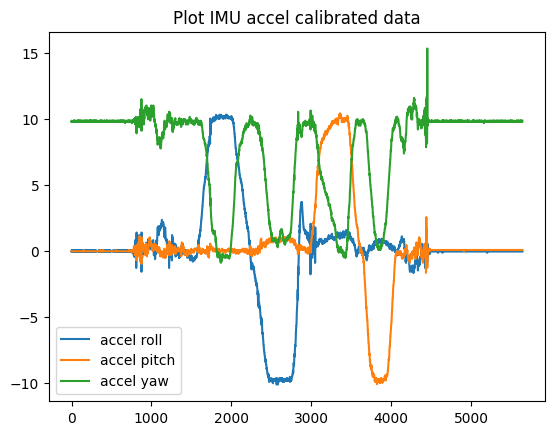

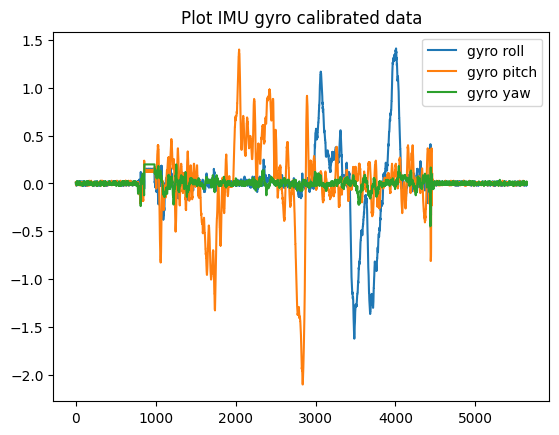

In [2]:
data_num = 1
imu = io.loadmat('imu/imuRaw'+str(data_num)+'.mat')
accel = imu['vals'][0:3,:] # order: roll, pitch, yaw
gyro = imu['vals'][3:6,:]
T = np.shape(imu['ts'])[1]
ts_imu = imu['ts'].reshape(-1,)
angle_names = ['roll', 'pitch', 'yaw']

accel_bias, accel_sensitivity = accel_calib_params(accel)
accel = accel_calibration(accel, accel_bias, accel_sensitivity)

gyro_bias, gyro_sensitivity = gyro_calib_params(gyro)
gyro = gyro_calibration(gyro, gyro_bias, gyro_sensitivity)

for i in range(3):
    plt.plot(np.arange(T), accel[i,:], label = 'accel '+ angle_names[i])
plt.title('Plot IMU accel calibrated data')
plt.legend()    
plt.show()

for i in range(3):
    plt.plot(np.arange(T), gyro[i,:], label = 'gyro '+ angle_names[i])
plt.title('Plot IMU gyro calibrated data')
plt.legend()    
plt.show()    

In [3]:
from estimate_rot import estimate_rot
roll, pitch, yaw = estimate_rot(data_num)

===  0  ===
Step 1 Flag
===  1  ===
Step 1 Flag
===  2  ===
Step 1 Flag
===  3  ===
Step 1 Flag
===  4  ===
Step 1 Flag
===  5  ===
Step 1 Flag
===  6  ===
Step 1 Flag
===  7  ===
Step 1 Flag
===  8  ===
Step 1 Flag
===  9  ===
Step 1 Flag
===  10  ===
Step 1 Flag
===  11  ===
Step 1 Flag
===  12  ===
Step 1 Flag
===  13  ===
Step 1 Flag
===  14  ===
Step 1 Flag
===  15  ===
Step 1 Flag
===  16  ===
Step 1 Flag
===  17  ===
Step 1 Flag
===  18  ===
Step 1 Flag
===  19  ===
Step 1 Flag
===  20  ===
Step 1 Flag
===  21  ===
Step 1 Flag
===  22  ===
Step 1 Flag
===  23  ===
Step 1 Flag
===  24  ===
Step 1 Flag
===  25  ===
Step 1 Flag
===  26  ===
Step 1 Flag
===  27  ===
Step 1 Flag
===  28  ===
Step 1 Flag
===  29  ===
Step 1 Flag
===  30  ===
Step 1 Flag
===  31  ===
Step 1 Flag
===  32  ===
Step 1 Flag
===  33  ===
Step 1 Flag
===  34  ===
Step 1 Flag
===  35  ===
Step 1 Flag
===  36  ===
Step 1 Flag
===  37  ===
Step 1 Flag
===  38  ===
Step 1 Flag
===  39  ===
Step 1 Flag
===  40  =

KeyboardInterrupt: 

Text(0.5, 1.0, 'yaw')

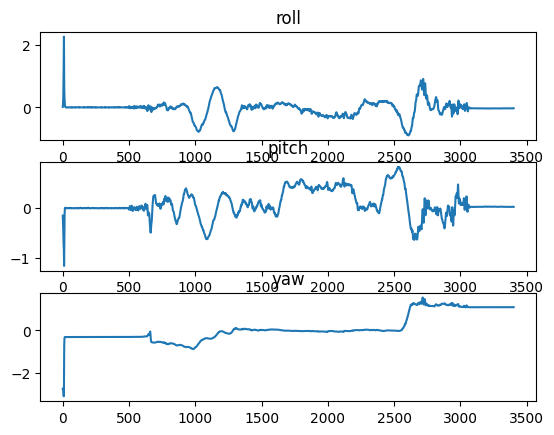

In [ ]:
plt.subplot(3,1,1)
plt.plot(np.arange(T-1), roll.reshape(-1))
plt.title('roll')

plt.subplot(3,1,2)
plt.plot(np.arange(T-1), pitch.reshape(-1))
plt.title('pitch')

plt.subplot(3,1,3)
plt.plot(np.arange(T-1), yaw.reshape(-1))
plt.title('yaw')

Text(0.5, 1.0, 'Vicon Euler angles data')

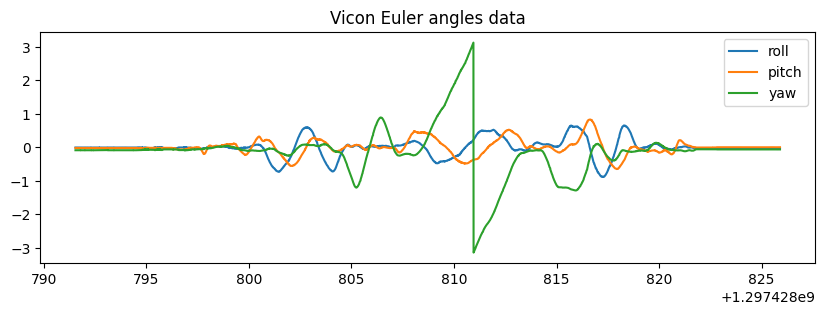

In [ ]:
vicon = io.loadmat('vicon/viconRot'+str(data_num)+'.mat')
T_vicon = np.shape(vicon['ts'])[1]
ts_vicon = vicon['ts'].reshape(-1,)

euler_vicon = []
for t in range(T_vicon):
    vicon_r = Rotation.from_matrix(vicon['rots'][:,:,t])
    euler_vicon.append(vicon_r.as_euler("zyx")) #yaw, pitch, roll
euler_vicon = np.array(euler_vicon).T
euler_vicon[[2,0], :] = euler_vicon[[0,2], :]

plt.figure(figsize = (10,3))
for i in range(3):
    plt.plot(ts_vicon, euler_vicon[i,:], label = angle_names[i])
plt.legend()
plt.title('Vicon Euler angles data')

Text(0.5, 1.0, 'yaw')

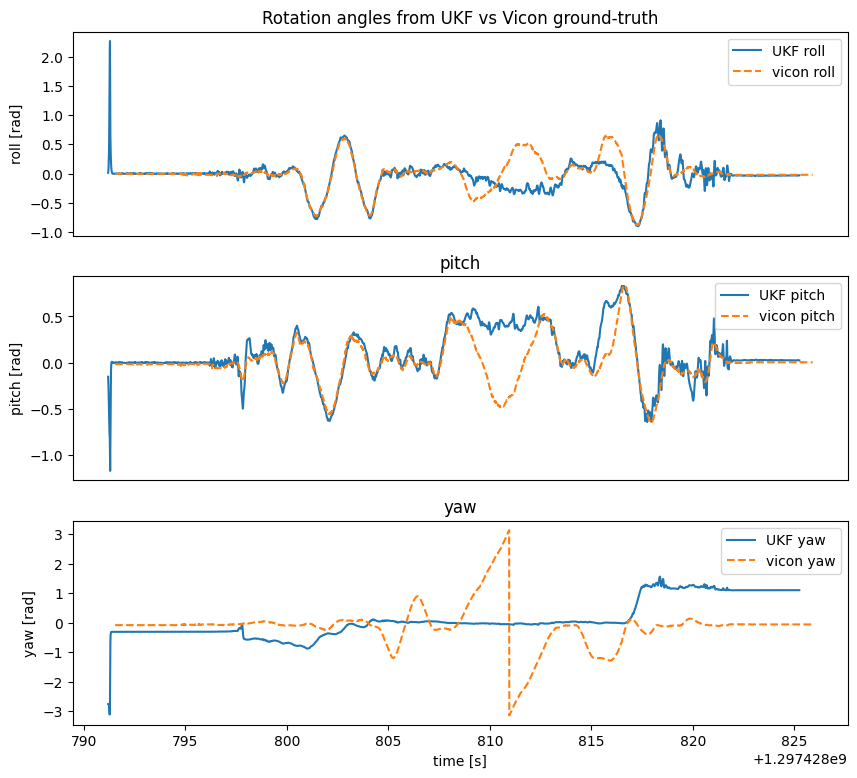

In [ ]:
plt.figure(figsize = (10,9))
plt.subplot(3,1,1)
plt.plot(ts_imu[:-1], roll.reshape(-1), label = 'UKF roll')
plt.plot(ts_vicon, euler_vicon[0,:], '--', label = 'vicon roll') 
plt.legend()
plt.ylabel('roll [rad]')
plt.xticks([])
plt.title('Rotation angles from UKF vs Vicon ground-truth')

plt.subplot(3,1,2)
plt.plot(ts_imu[:-1], pitch.reshape(-1), label = 'UKF pitch')
plt.plot(ts_vicon, euler_vicon[1,:], '--', label = 'vicon pitch')
plt.legend()
plt.ylabel('pitch [rad]')
plt.xticks([])
plt.title('pitch')

plt.subplot(3,1,3)
plt.plot(ts_imu[:-1], yaw.reshape(-1), label = 'UKF yaw')
plt.plot(ts_vicon, euler_vicon[2,:], '--', label = 'vicon yaw')
plt.legend()
plt.ylabel('yaw [rad]')
plt.xlabel('time [s]')
plt.title('yaw')

In [ ]:
a = 
np.sin

SyntaxError: invalid syntax (1719913884.py, line 1)